## ***AMAN PRAJAPATI 23117019***

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,  accuracy_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow

## Reading the dataset

In [44]:
df=pd.read_csv("tips (data for regression problem).csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [46]:
df.shape

(244, 7)

In [47]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Extracting numerical columns into a separate dataframe

In [48]:
df_n = df.select_dtypes(include=['number'])
print(df_n)

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]


## Converting the categorical columns into numerical using one hot encoding

In [49]:
df = pd.get_dummies(df, drop_first=True)
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


## Plotting various graphs to analyze the relationships

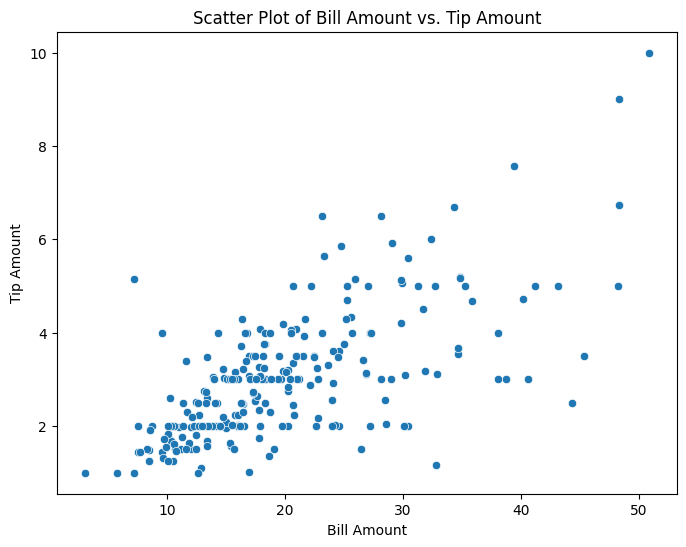

In [50]:
# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Bill Amount vs. Tip Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Tip Amount')
plt.show()

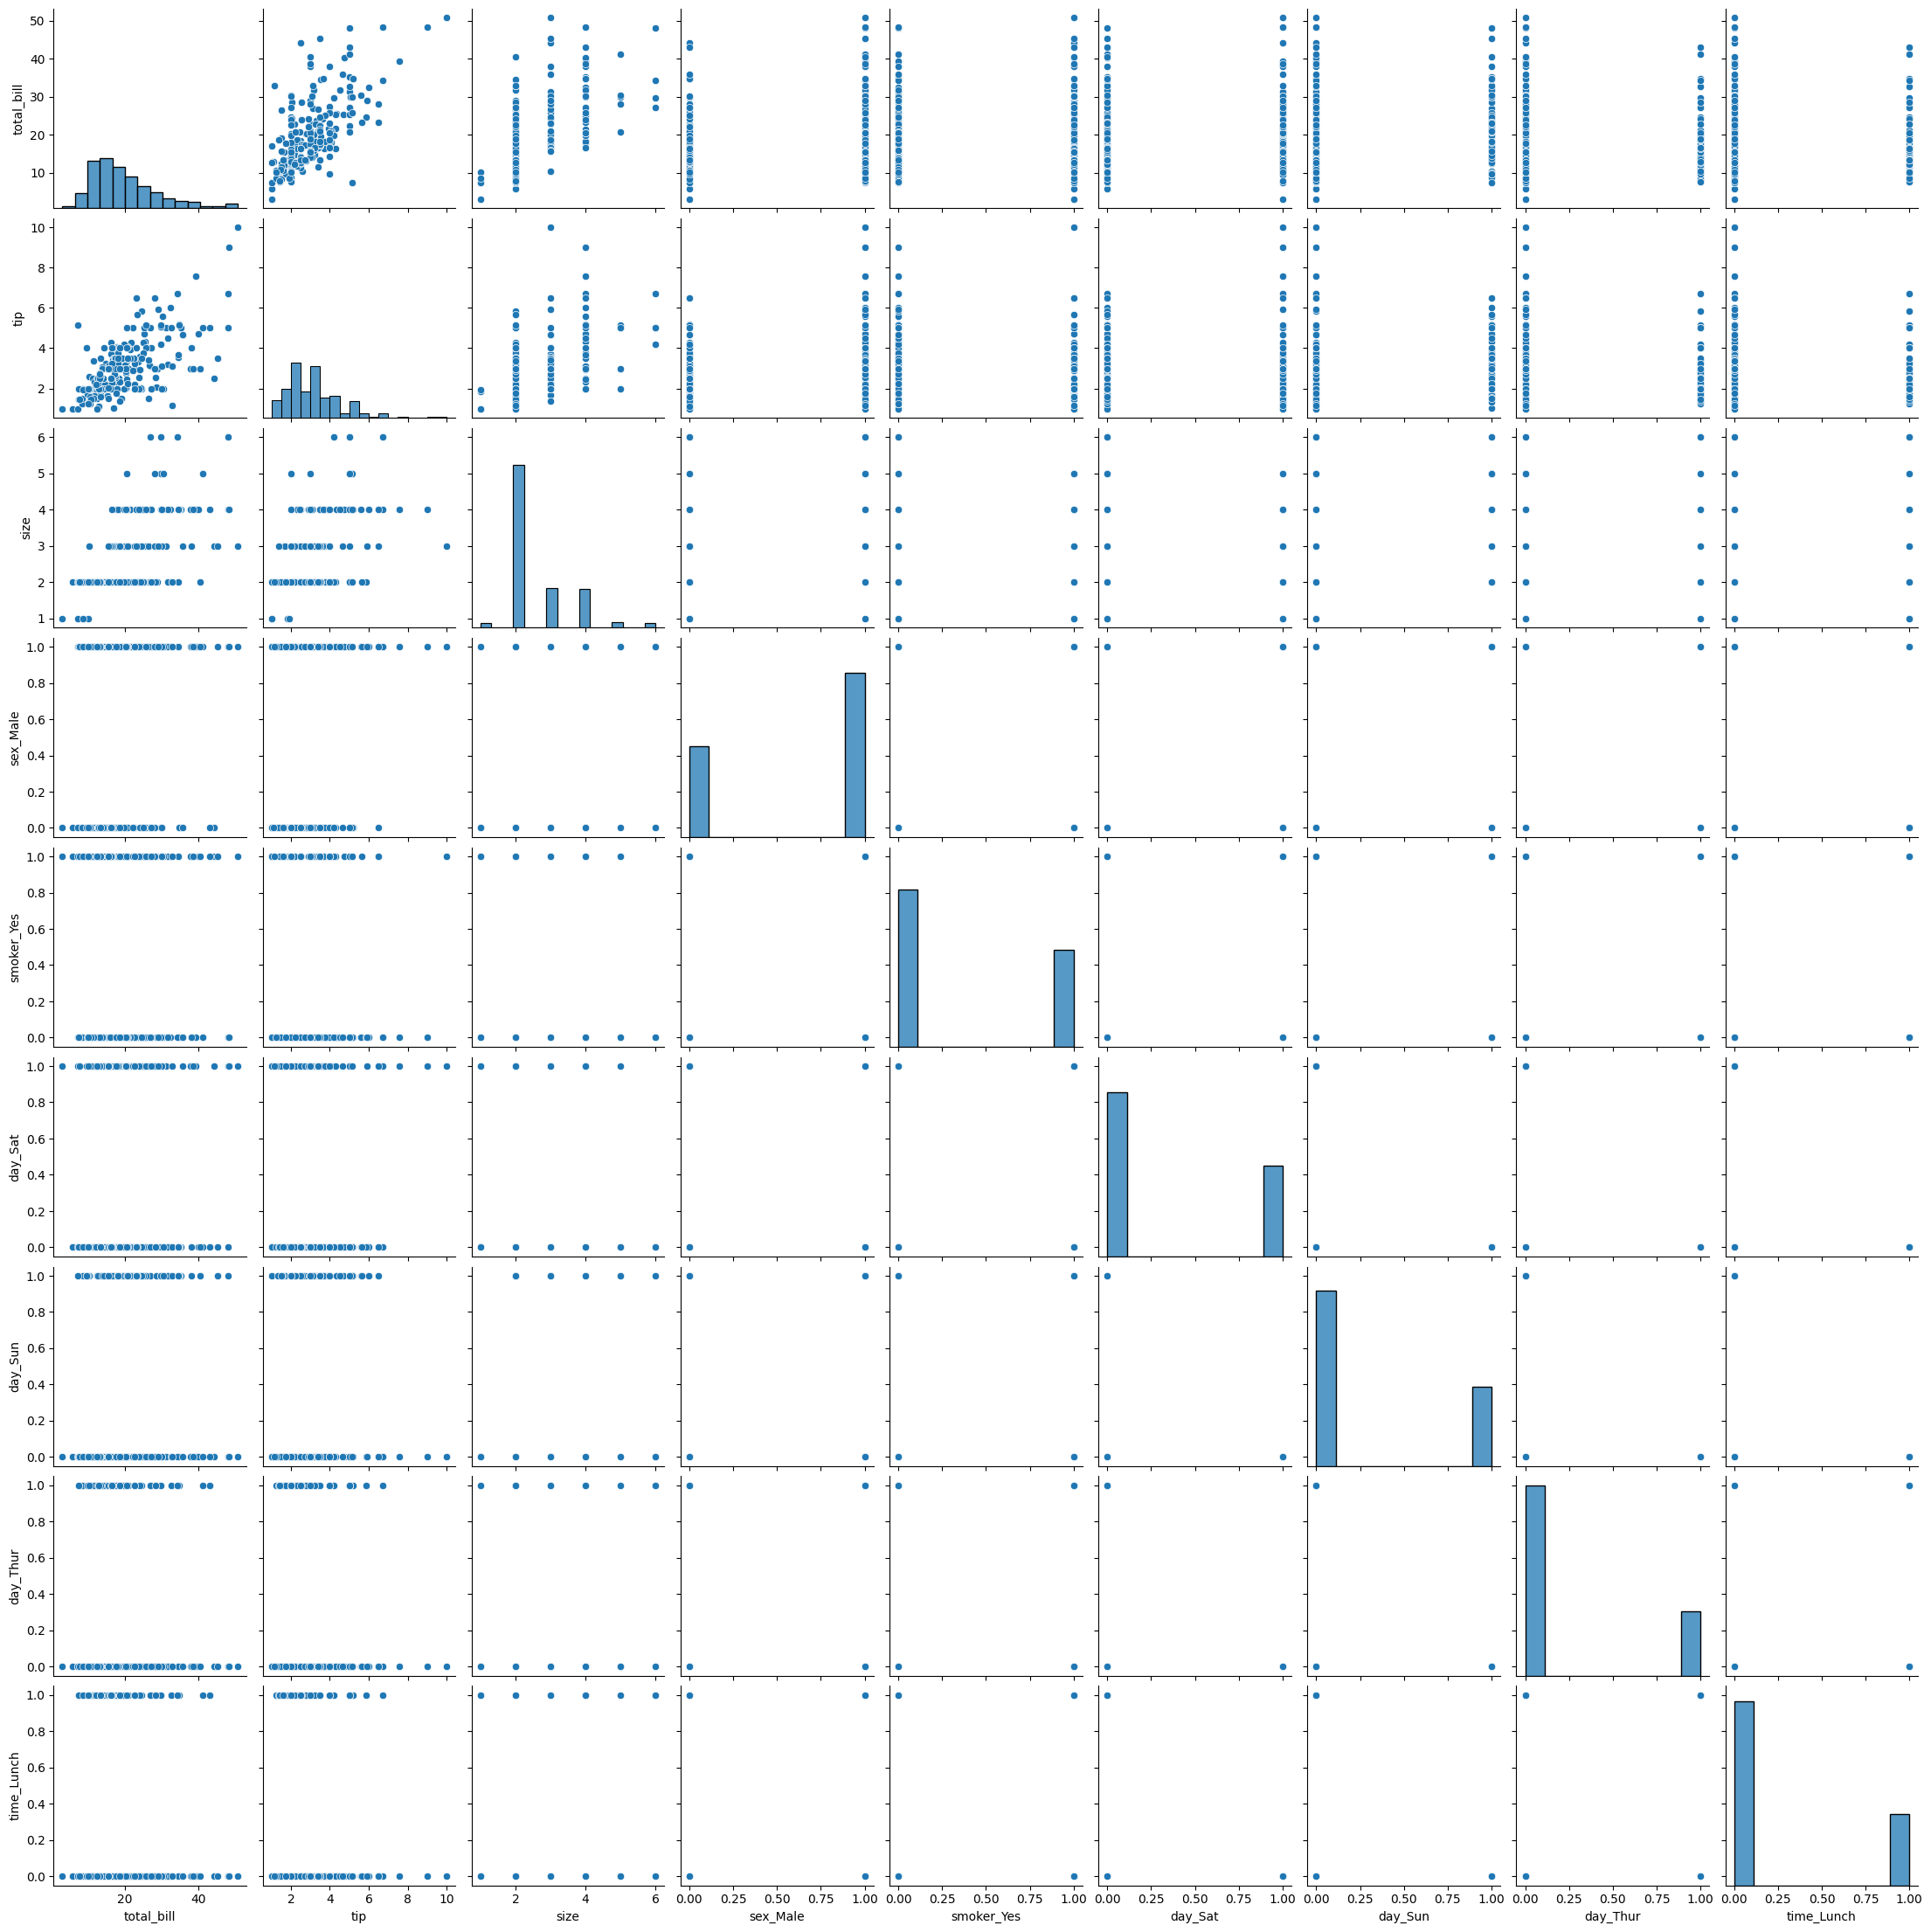

In [51]:
# 2. Pair Plot
sns.pairplot(df)
plt.show()

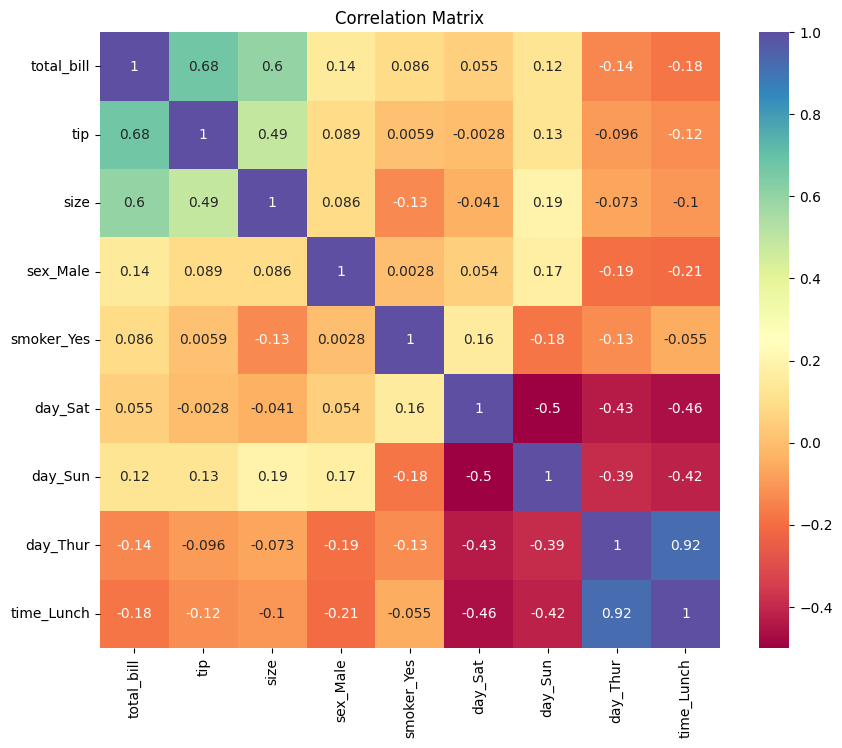

In [52]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

##  for Linearity : (Rainbow Test) 

Rainbow Test Statistic: 1.197054547994589
p-value: 0.1658838305924149
No evidence against linearity (p-value > 0.05). The linearity assumption holds.


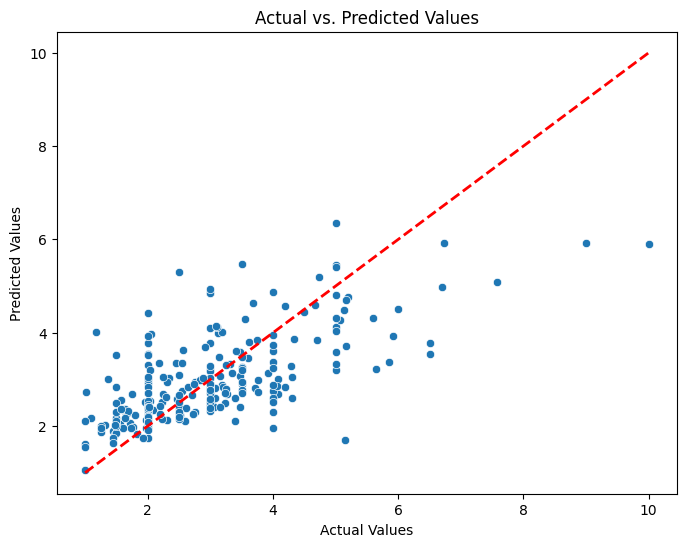

In [53]:
X = df.drop('tip', axis=1)
y = df['tip']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()

# Perform the Rainbow Test
test_statistic, p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", test_statistic)
print("p-value:", p_value)

if p_value > 0.05:
    print("No evidence against linearity (p-value > 0.05). The linearity assumption holds.")
else:
    print("Evidence against linearity (p-value <= 0.05). Consider non-linear models.")

# Predicted values
y_pred = model.predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)  # 45-degree reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

## Residuals plot to check for linearity

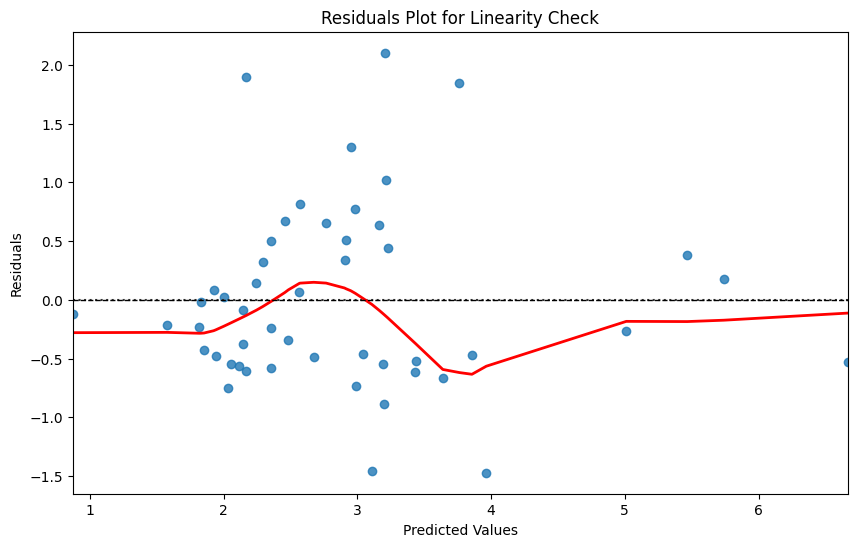

In [54]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Linearity Check")
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.show()

## Line Plot (for time-series data) 

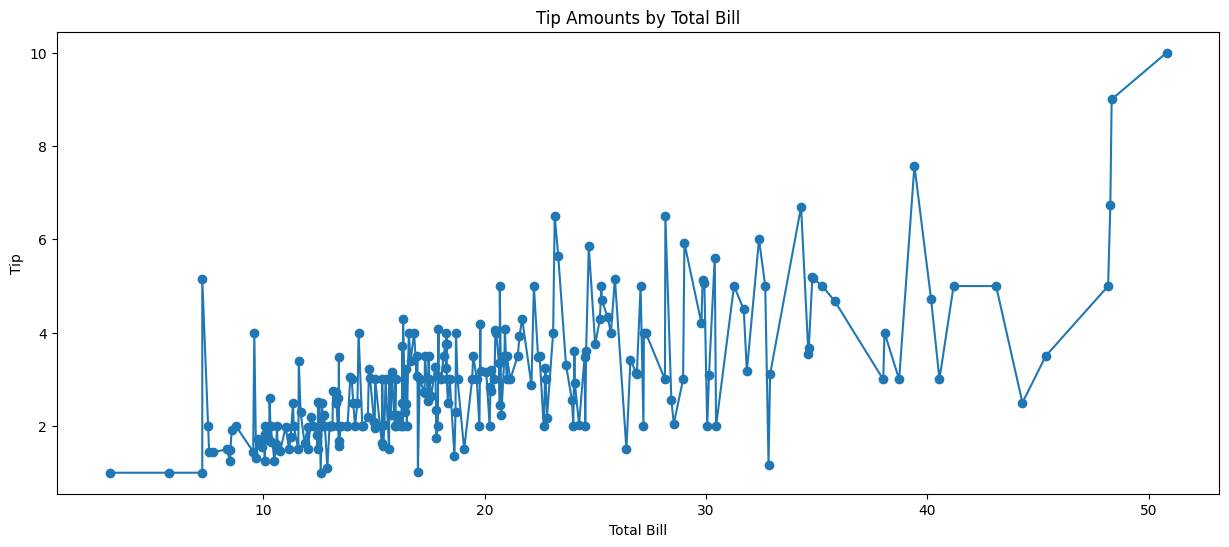

In [55]:
# Sorting data by total bill for line plot (as a stand-in for time series)
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(15, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

## **Performing regression tests to predict tip amount using all the features**

In [56]:
### Model Training and Evaluation
results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr)
}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2 Score': r2_score(y_test, y_pred_ridge)
}

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2 Score': r2_score(y_test, y_pred_lasso)
}

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt)
}

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf)
}

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 Score': r2_score(y_test, y_pred_svr)
}

# 7. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 Score': r2_score(y_test, y_pred_knn)
}

for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")



Linear Regression: MSE = 0.57, R2 Score = 0.54
Ridge Regression: MSE = 0.57, R2 Score = 0.54
Lasso Regression: MSE = 0.57, R2 Score = 0.55
Decision Tree Regression: MSE = 1.34, R2 Score = -0.07
Random Forest Regression: MSE = 1.01, R2 Score = 0.19
Support Vector Regression: MSE = 0.61, R2 Score = 0.51
K-Nearest Neighbors Regression: MSE = 0.68, R2 Score = 0.45


### SVR seems to be the most promising model, followed by Lasso Regression because of low MSE and high R2 Score.

### **Next we can perform feature enginnering to enhance the accuracy of model by selecting different types of columns**
### -   Using only numerical columns

In [57]:
# Split data into features and target variable
X = df_n.drop('tip', axis=1)  
y = df_n['tip']               

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
### Model Training and Evaluation
results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr)
}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2 Score': r2_score(y_test, y_pred_ridge)
}

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2 Score': r2_score(y_test, y_pred_lasso)
}

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt)
}

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf)
}

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 Score': r2_score(y_test, y_pred_svr)
}

# 7. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 Score': r2_score(y_test, y_pred_knn)
}
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")



Linear Regression: MSE = 0.65, R2 Score = 0.48
Ridge Regression: MSE = 0.65, R2 Score = 0.48
Lasso Regression: MSE = 0.59, R2 Score = 0.53
Decision Tree Regression: MSE = 1.02, R2 Score = 0.18
Random Forest Regression: MSE = 0.83, R2 Score = 0.33
Support Vector Regression: MSE = 0.53, R2 Score = 0.57
K-Nearest Neighbors Regression: MSE = 0.74, R2 Score = 0.41


## here also, when only numerical columns are used SVR seems to be the most promising model, followed by Lasso Regression because of low MSE and high R2 Score.

## **Predicting the feature importance**

Feature Importance (based on coefficient magnitude):
      Feature  Coefficient
0  total_bill     0.828432
1        size     0.219073
3  smoker_Yes    -0.093581
4     day_Sat    -0.089121
6    day_Thur    -0.076868
7  time_Lunch     0.042245
5     day_Sun    -0.023550
2    sex_Male     0.013734


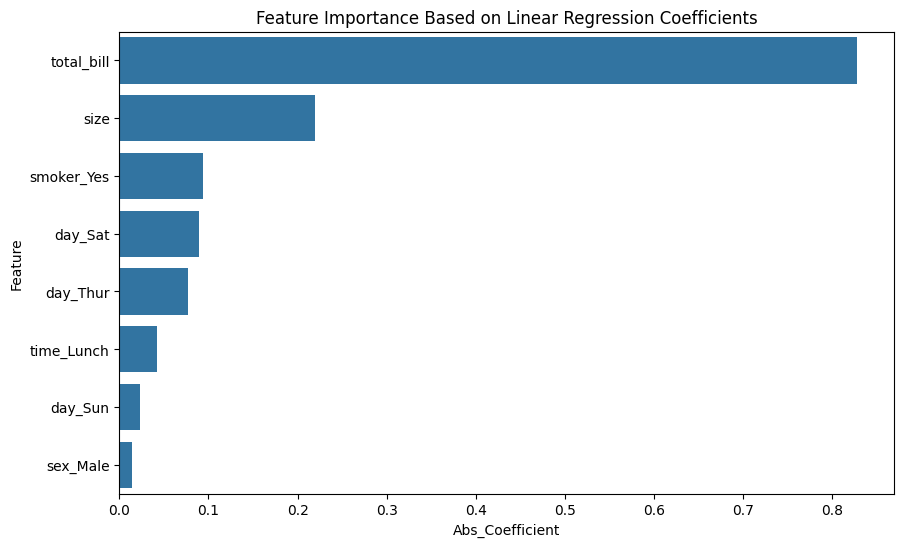

In [59]:
from sklearn.preprocessing import StandardScaler
X = df.drop('tip', axis=1) 
y = df['tip'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
feature_names = X.columns
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])  # Use absolute values for importance
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance (based on coefficient magnitude):")
print(feature_importance[['Feature', 'Coefficient']])

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance Based on Linear Regression Coefficients")
plt.show()

## As we can see the total bill column is most important feature to predict the tip, thus we can separately use it to build a new model to improve the speed and accuracy

## **Using only total bill column to predict the tip**

In [60]:
X = df[["total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr)
}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2 Score': r2_score(y_test, y_pred_ridge)
}

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2 Score': r2_score(y_test, y_pred_lasso)
}

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt)
}

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf)
}

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 Score': r2_score(y_test, y_pred_svr)
}

# 7. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 Score': r2_score(y_test, y_pred_knn)
}

# Display model performance
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")



Linear Regression: MSE = 0.57, R2 Score = 0.54
Ridge Regression: MSE = 0.57, R2 Score = 0.54
Lasso Regression: MSE = 0.57, R2 Score = 0.55
Decision Tree Regression: MSE = 1.34, R2 Score = -0.07
Random Forest Regression: MSE = 1.01, R2 Score = 0.19
Support Vector Regression: MSE = 0.61, R2 Score = 0.51
K-Nearest Neighbors Regression: MSE = 0.68, R2 Score = 0.45


## When only total bill column is used, MSE decreases and R2 score also increases. Lasso Regression performs the best here

## **Conclusion**

- **Factors Affecting Tip Amounts:**
  - Different models were created using different number and type of features. Also the feature importance of every feature was plotted using the regression algorithm. Out of all the features, the total bill column had a significant impact on the total bill, followed by the size of group which came to restaurant.
- **Prediction Accuracy:**
  - SVR gave the highest R-squared value (0.57) and gave consistently best results of MSE
  - Lasso regression gave good results when only the Total Bill was used as a feature
  - Rest other models performed fairly. Nonetheless, the MSE of any model never decreased to less than 0.30


- **Insights for Management:**
  - "Total Bill" has a strong impact on tip amount, thus, encouraging premium customers to visit frequently will lead to increased tips.This can be done by providing special offers or means of recreation to them, like free drinks and other stuff.
  - Incorporating more number of premium dishes of good quality at moderate price will also favor high tip amounts.
